# <span style='color:blue'> TRABAJO PRÁCTICO N°1 - ESPACIOS CROMÁTICOS </span>
### 1) Cargar una imágen y obtener los 3 canales RGB, indicando cómo es la matriz de transformación utilizada en cada caso.
### 2) Intercambiar los canales de una imágen (R-->G, G-->B, B-->R)
### 3) Convertir una imágen RGB a YIQ.
####      a) Modificar los canales YIQ.
####      b) Volver a convertir la imágen a RGB, y compararla con la original.
#### ------------------------------------------------------------------------------

__Importar Librerias__

In [ ]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores
import matplotlib.pyplot as plt    #Para realizar graficos.

import warnings     # (Opcional) Es para evitar algunos mensajes de warning.
warnings.filterwarnings('ignore')

#Para realizar los graficos en la misma linea de codigo.
%matplotlib inline

__Funciones__

In [ ]:
#Función para operaciones con matrices.
def apply_matrix(img, M):
        return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

__Cargo una Imagen__

(2448, 3264, 3)


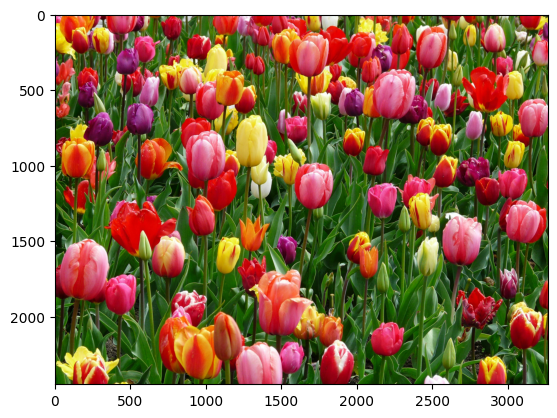

In [ ]:
#Cargar una imagen con la libreria imageio.
#La imagen se guarda con valores de 0-255, por eso divido /255 para normalizarla entre 0-1.
img_rgb = imageio.imread('images/ejemplo1.jpg')/255

#Muestro la imagen
plt.imshow(img_rgb)

print(img_rgb.shape)         #Tamaño de la imagen y capas (ojo si son 4 capas, una puede ser de transparencia)

#print(img_rgb)              #IMG como matriz
#print(img_rgb[:,:,1])       #IMG como matriz solo capa 1
#print(img_rgb[0:10,0:10,1]) #Solo un sector y solo capa 1
#type(img_rgb.dtype)         #UINT-8 (0-255) - Float64 (0...1)

__Seleccionar un canal RGB__

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.0].


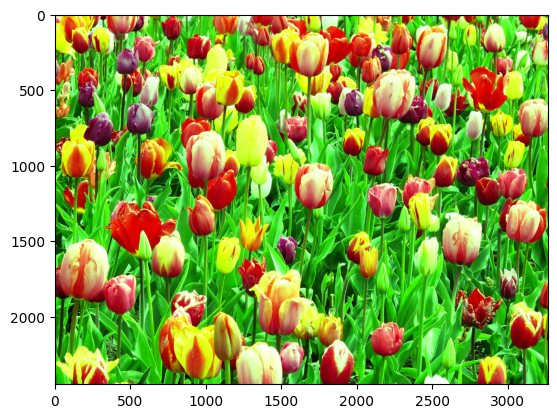

In [ ]:
#Creo una matriz de transformación.
M = np.array([[1,0,0],          # [R,0,0]
              [0,2,0],          # [0,G,0]
              [0,0,1]])         # [0,0,B]

#Multiplico la imagen por la matriz de transformación.
img_result = apply_matrix(img_rgb, M)
#print(img_red)   #Para ver la matriz resultante

#Muestro la imagen
plt.imshow(img_result)

### Ejemplos: Matrices de transformación
__Convierto la imagen a escala de grises__

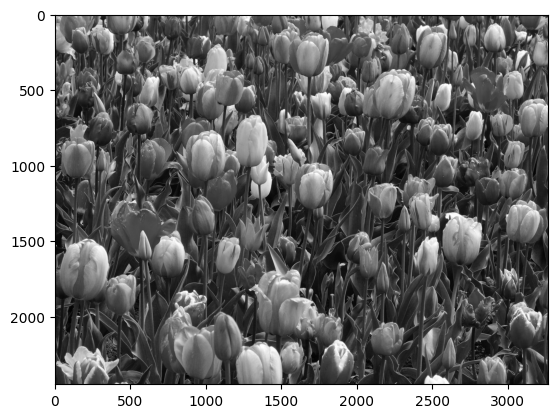

In [ ]:
# Matriz de transformación de unos (1/3 en realidad)
M = np.ones((3,3))/3

#Multiplico la imagen por la matriz de transformación.
img_gray = apply_matrix(img_rgb, M)

plt.imshow(img_gray)

__Otra forma de obtener la imagen en escala de grises__

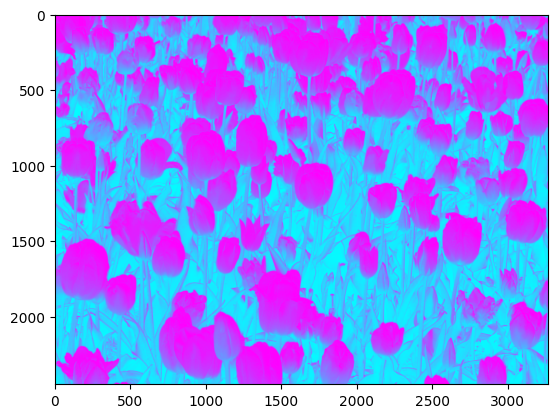

In [ ]:
img_ch = img_rgb[:,:,0]    #Elijo solo el canal 0 (Una sola matriz)
#plt.imshow(img_ch,'gray')
plt.imshow(img_ch,'cool') #Hay otras paletas.
#Probar algunas --> https://matplotlib.org/stable/tutorials/colors/colormaps.html

__Convierto la imagen con una matriz de transformación aleatoria__

[[0.33483814 0.04389714 0.80264416]
 [0.65182926 0.45738987 0.72226558]
 [0.38511645 0.29023039 0.49204965]]


Text(0.5, 1.0, 'Imagen Original')

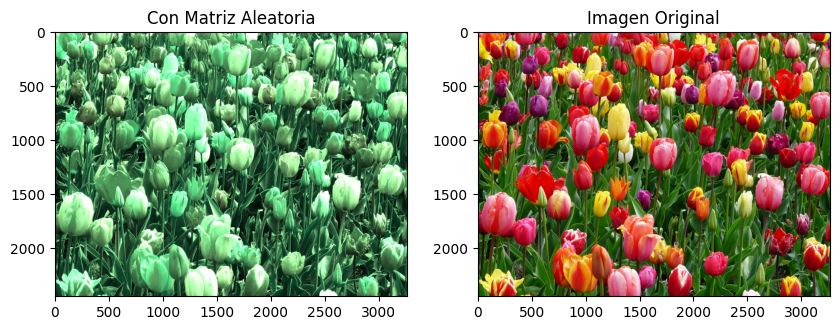

In [ ]:
#Genero una matriz de transformacion aleatoria de 3x3.
M = np.random.rand(3,3)
print(M)

#Multiplico la imagen por la matriz de transformación.
img_random = apply_matrix(img_rgb, M)

#Muestro la imagen
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_random,0,1))
axes[0].set_title('Con Matriz Aleatoria')
axes[1].imshow(img_rgb)
axes[1].set_title('Imagen Original')

__Regreso la imagen transformada a la original__

[[  1.12177016  15.36034618 -24.37687253]
 [ -3.0942774  -10.49118567  20.44717635]
 [  0.94714262  -5.83408814   9.0510024 ]]


Text(0.5, 1.0, 'Imagen Original')

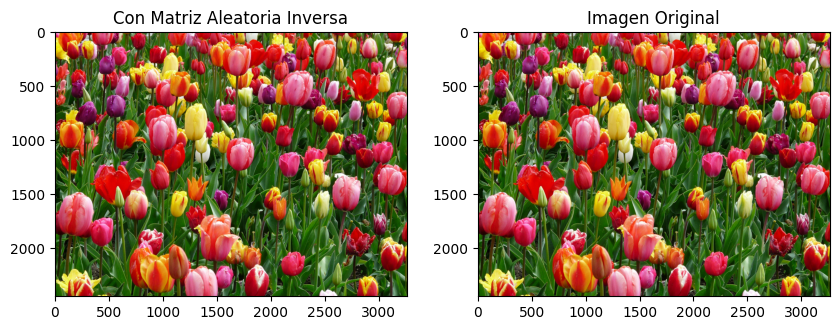

In [ ]:
#Declaro la matriz inversa de M como M_inv.
M_inv = np.linalg.inv(M)
print(M_inv)

#Multiplico la imagen por la matriz de transformación
img_random_inv = apply_matrix(img_random, M_inv)

#Muestro la imagen ("np.clip(image,min,max)" -> para recortar los valores entre min y max)
fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_random_inv, 0, 1))
axes[0].set_title('Con Matriz Aleatoria Inversa')
axes[1].imshow(np.clip(img_rgb, 0, 1))
axes[1].set_title('Imagen Original')

### __Operaciones en el espacio YIQ__
* Y: Luminescence, brightness information
* I: Phase, orange and cyan information
* Q: Quadrature, green and magenta information

  * IQ: Defines chrominance

__Convierto la imagen RGB a YIQ__

Text(0.5, 1.0, 'Canal Q')

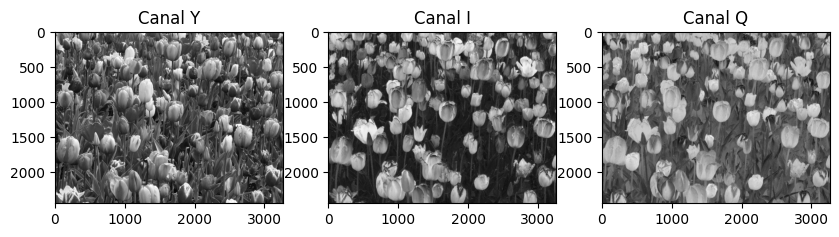

In [ ]:
#Matriz de transformación.
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

#Multiplico la imagen por la matriz de transformación y la separo en tres matrices independientes.
img_yiq = apply_matrix(img_rgb, M_YIQ)
y_channel = img_yiq[:,:,0]
i_channel = img_yiq[:,:,1]
q_channel = img_yiq[:,:,2]

#Muestro la imagen
fig, axes = plt.subplots(1,3,figsize=(10,5))
axes[0].imshow(y_channel,'gray')
axes[0].set_title('Canal Y')
axes[1].imshow(i_channel,'gray')
axes[1].set_title('Canal I')
axes[2].imshow(q_channel,'gray')
axes[2].set_title('Canal Q')


__Modifico el Canal Y con un valor constante ($\alpha$)__

Mínimo: 0.0, Máximo:1.9999999999999998


Text(0.5, 1.0, 'Canal Y original')

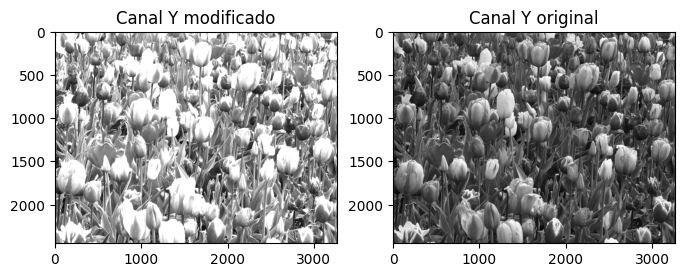

In [ ]:
#Multiplico el canal Y por una constante
alpha=2
y_channel_mod = y_channel*alpha

#Hay que recortar el rango, segun el canal:
# Y --> [0,1]
# I --> [-0.5957,0.5957]
# Q --> [-0.5226, 0.5226]

#Vemos que se va de rango
print(f"Mínimo: {y_channel_mod.min()}, Máximo:{y_channel_mod.max()}")


y_channel_mod = np.clip(y_channel_mod,0,1)

#Muestro la imagen
fig, axes = plt.subplots(1,2,figsize=(8,5))
axes[0].imshow(y_channel_mod,'gray')
axes[0].set_title('Canal Y modificado')
axes[1].imshow(y_channel,'gray')
axes[1].set_title('Canal Y original')


__Modificar los canales  I, Q con un valor constante ($\beta$)__

In [1]:
#Multiplico los canales I Q por una constante
beta=2
i_channel_mod = i_channel*beta
q_channel_mod = q_channel*beta

#Hay que recortar el rango, segun el canal:
i_channel_mod = np.clip(i_channel_mod,#minimo,#maximo)
q_channel_mod = np.clip(q_channel_mod,#minimo,#maximo)

#Muestro la imagen
fig, axes = plt.subplots(2,2,figsize=(10,7))
axes[0,0].imshow(i_channel_mod,'gray')
axes[0,0].set_title('Canal I modificado')
axes[0,1].imshow(i_channel,'gray')
axes[0,1].set_title('Canal I original')
axes[1,0].imshow(q_channel_mod,'gray')
axes[1,0].set_title('Canal Q modificado')
axes[1,1].imshow(q_channel,'gray')
axes[1,1].set_title('Canal Q original')

SyntaxError: '(' was never closed (<ipython-input-1-50d55e7896aa>, line 8)

#### Tras las modificaciones de los canales YIQ, se puede convertir a RGB nuevamente.
#### Chequear que los valores de los canales esten dentro de los rangos, ya sea en RGB o en YIQ.

__Convierto la imagen YIQ a RGB__

Mínimo: -0.5502638599999999, Máximo:1.89420251


Text(0.5, 1.0, 'Imagen Original')

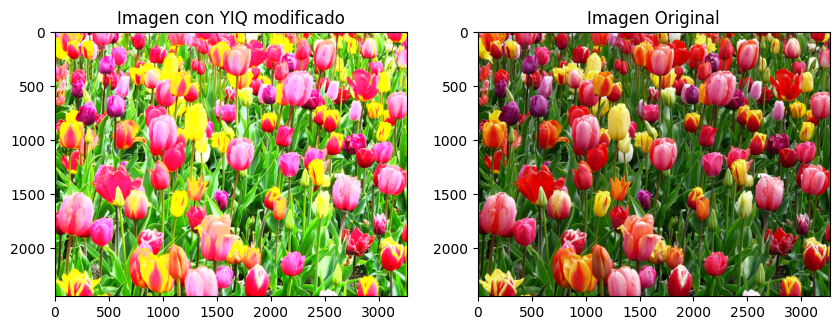

In [ ]:
#Matriz de transformación.
M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

#Creo una imagen vacia del mismo tamaño que la original (y con 3 canales)
img_yiq_mod = np.zeros(img_yiq.shape) #print(img_yiq_mod.shape)

#Guardo cada canal en la imagen vacia
img_yiq_mod[:,:,0] = y_channel_mod
img_yiq_mod[:,:,1] = i_channel_mod
img_yiq_mod[:,:,2] = q_channel_mod

#Multiplico la imagen por la matriz de transformación.
img_rgb_mod = apply_matrix(img_yiq_mod, M_RGB)

#Vemos que se va de rango
print(f"Mínimo: {img_rgb_mod.min()}, Máximo:{img_rgb_mod.max()}")

fig, axes = plt.subplots(1,2,figsize=(10,5))
axes[0].imshow(np.clip(img_rgb_mod,0,1))
axes[0].set_title('Imagen con YIQ modificado')
axes[1].imshow(np.clip(img_rgb,0,1)) # Se corrige el rango
axes[1].set_title('Imagen Original')
